Базовые методы:

# Загрузка библиотек

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

# Грузим датасет

In [33]:
df = pd.read_csv('../data/raw/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [34]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

# Мини EDA

In [35]:
print(df.isnull().sum())
# Пропусков нет

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


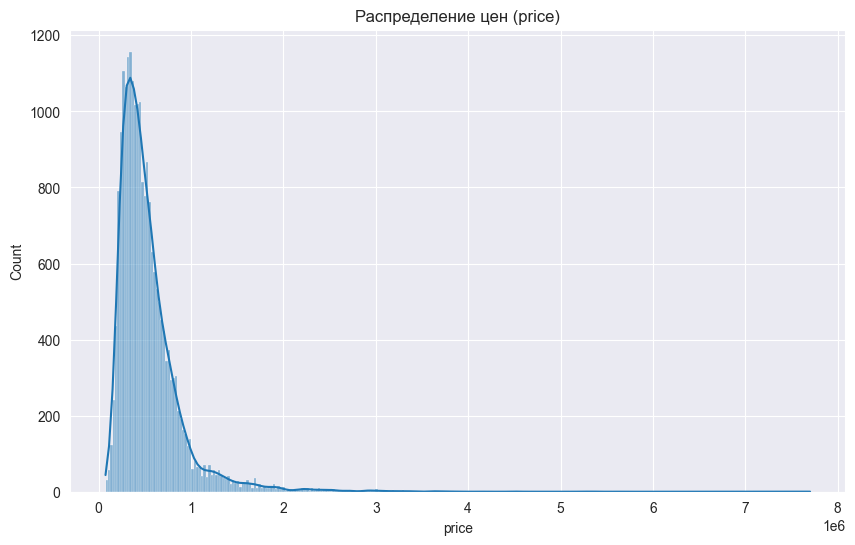

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Распределение цен (price)')
plt.show()
# Видим что распределение является нормальным и мы можем использовать линейную регрессию

Вывод: Распределение цен правостороннее (скошенное вправо), большинство домов стоят до 1-1.5 млн.
Присутствуют редкие очень дорогие объекты (выбросы). Для линейной регрессии может потребоваться 
логарифмирование цены или обработка выбросов.

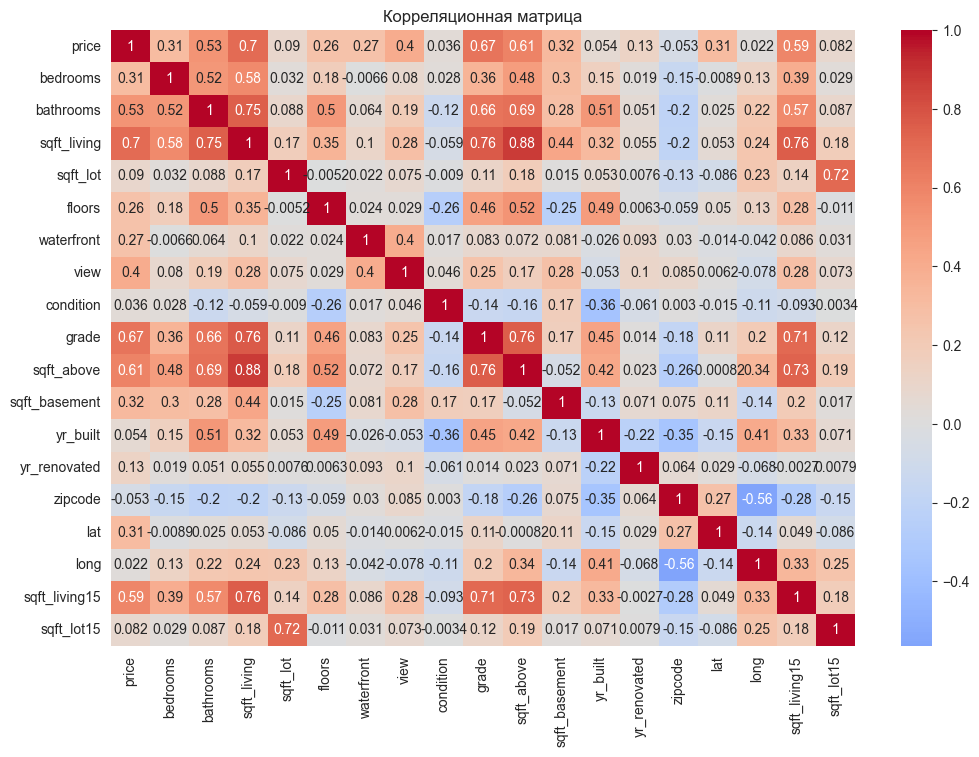

In [37]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop('id', axis=1, errors='ignore').corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()
# по данной матрице видим уже, что цена сильно зависит от таких признаков как жилая площадь, оценка и других с 0.6+, и плохо зависит с зипкод и другими по модулю близких к 0

Вывод: Цена действительно сильно коррелирует с ;жилая площадь (0.7), оценка (0.67), площадь сверху (0.61).
Слабая корреляция с зипкод, год постройки, состояние. Мультиколлинеарность: жилая площадь 
сильно коррелирует с площадью сверху и жилая площадь15 - возможно, стоит исключить некоторые признаки.

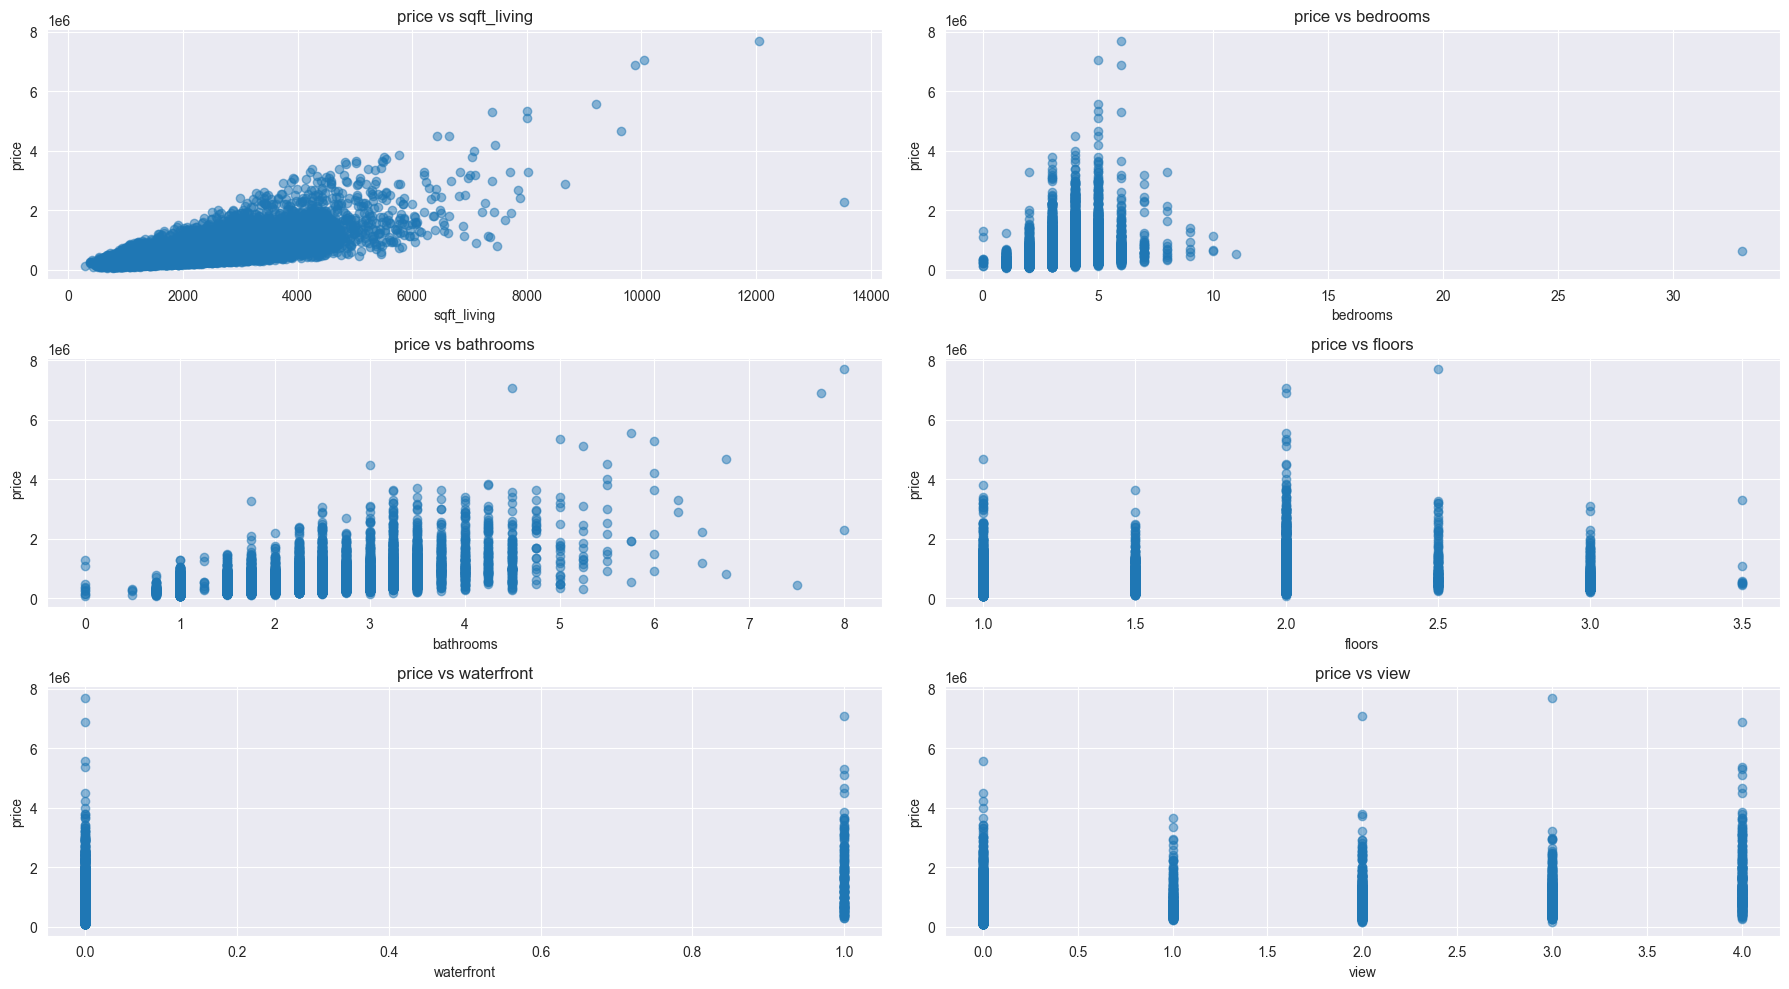

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
axes = axes.flatten()

features_to_plot = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view']
for i, feature in enumerate(features_to_plot):
    axes[i].scatter(df[feature], df['price'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('price')
    axes[i].set_title(f'price vs {feature}')

plt.tight_layout()
plt.show()
# Смотрим на признаки, кореляция которых наиболее высокая с ценой, и видим что их распределине в целом тоже нормальное и мы их оставляем

Выводы по графикам:
1. жилая площадь, м^2: Четкая положительная линейная зависимость - чем больше площадь, тем выше цена.
2. спальни: Зависимость слабее, есть выбросы (особенно дом с 33 спальнями).
3. ванные: Положительная зависимость, но с большим разбросом.
4. полы: Слабая зависимость, возможно, категориальный признак.
5. набережная: Явная разница - дома с видом на воду значительно дороже (бинарный признак).
6. вид: Прослеживается зависимость - чем лучше вид, тем выше цена.

# Обработка выбросов

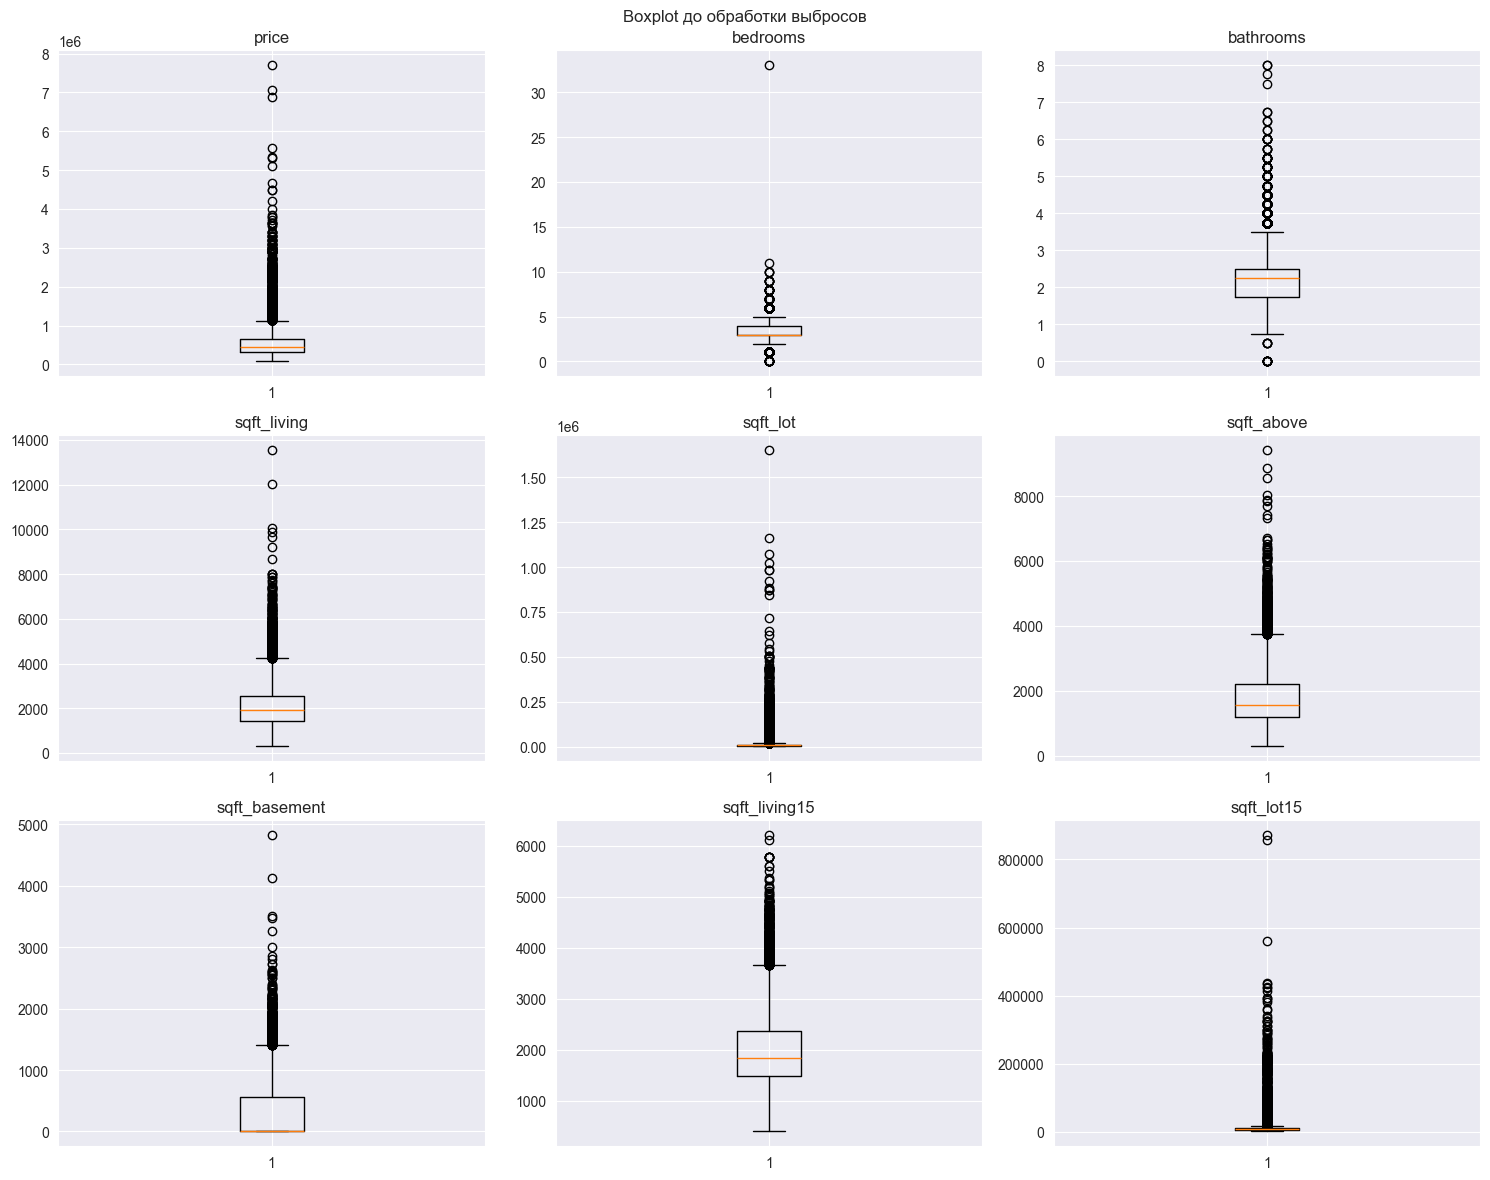

По графикам видно — значительная часть данных превышает верхнюю границу — есть выбросы.
price: 420 выбросов
bedrooms: 24 выбросов
bathrooms: 64 выбросов
sqft_living: 74 выбросов
sqft_lot: 1771 выбросов
sqft_above: 60 выбросов
sqft_basement: 29 выбросов
sqft_living15: 23 выбросов
sqft_lot15: 1613 выбросов

Всего строк с выбросами: 2344 (10.85%)
Новая размерность датасета: (19269, 21)


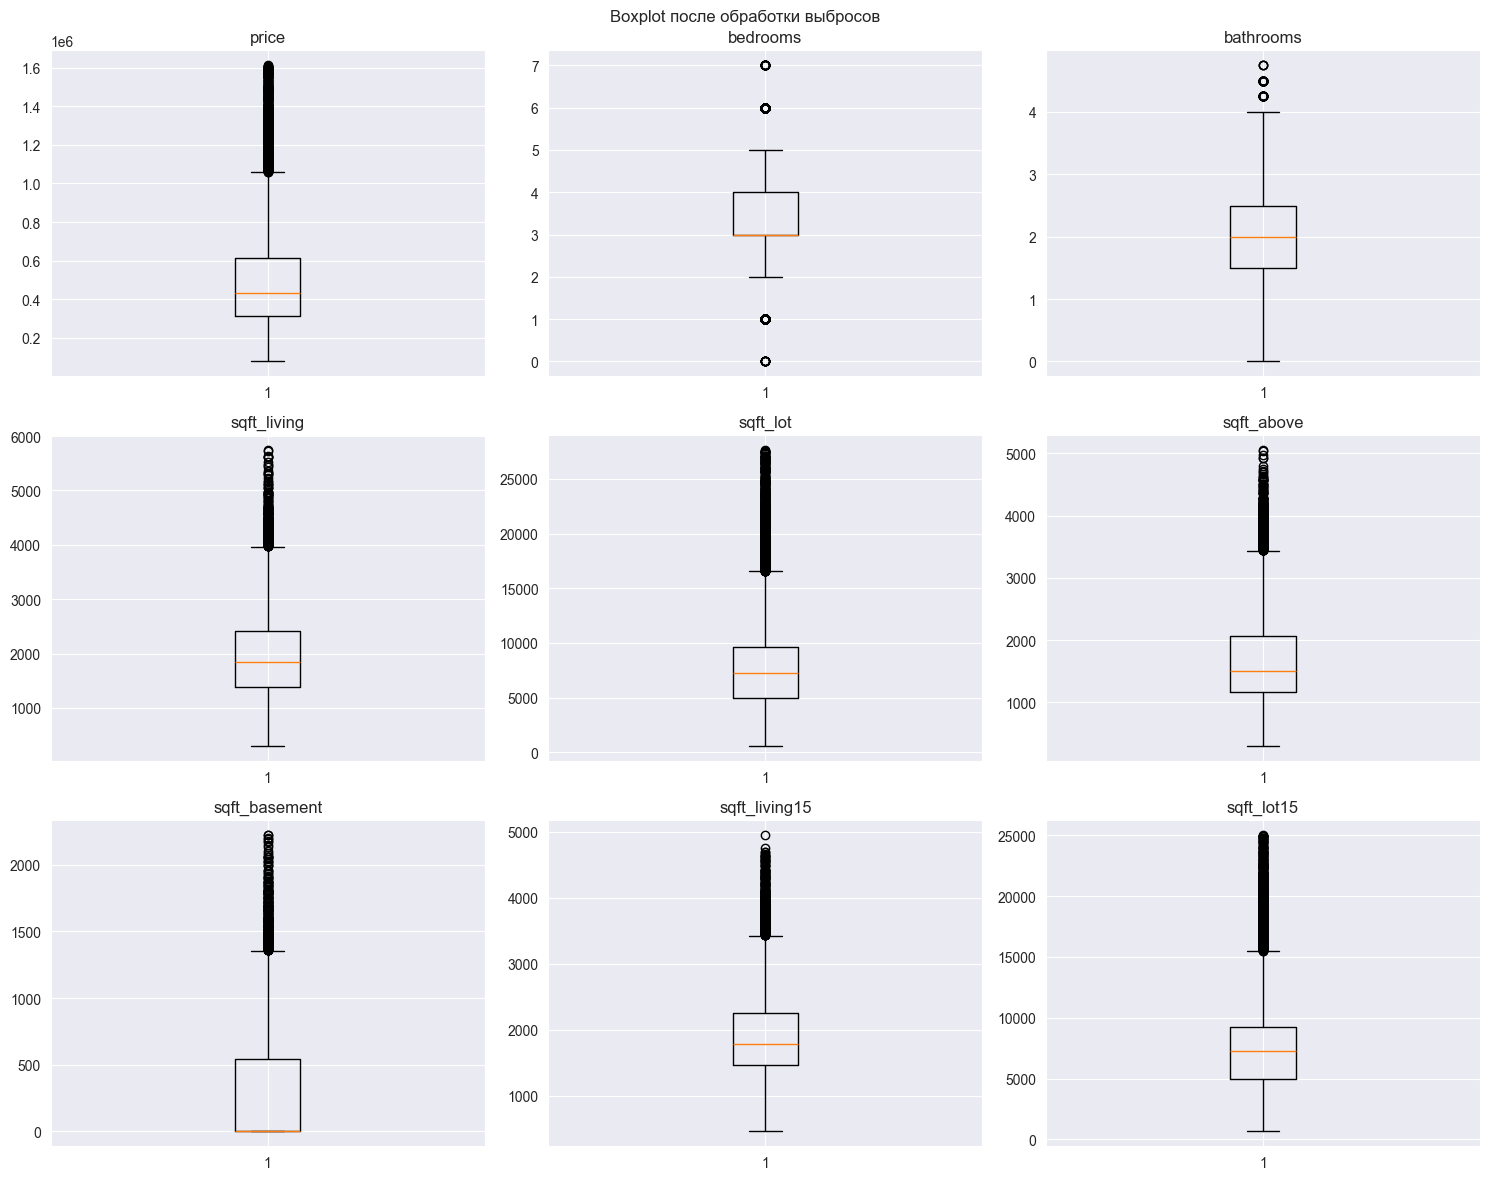

После удаления выбросов распределения стали компактнее и ближе к нормальным формам.


In [39]:
# Обработка выбросов

numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                   'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

def handle_outliers(df, columns, threshold=1.5):
    df_clean = df.copy()
    outliers_indices = []

    for column in columns:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - threshold * IQR
            upper = Q3 + threshold * IQR
            outliers = df[(df[column] < lower) | (df[column] > upper)]
            outliers_indices.extend(outliers.index.tolist())
            print(f"{column}: {len(outliers)} выбросов")

    outliers_indices = list(set(outliers_indices))
    print(f"\nВсего строк с выбросами: {len(outliers_indices)} "
          f"({len(outliers_indices)/len(df)*100:.2f}%)")

    df_clean = df_clean.drop(outliers_indices)
    print(f"Новая размерность датасета: {df_clean.shape}")
    return df_clean


# Графики до обработки выбросов
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)

plt.suptitle('Boxplot до обработки выбросов')
plt.tight_layout()
plt.show()

print("По графикам видно — значительная часть данных превышает верхнюю границу — есть выбросы.")

# Удаление выбросов
df = handle_outliers(df, numeric_columns, threshold=3)


# Графики после удаления
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col)

plt.suptitle('Boxplot после обработки выбросов')
plt.tight_layout()
plt.show()

print("После удаления выбросов распределения стали компактнее и ближе к нормальным формам.")


Для обработки выбросов был применён метод межквартильного размаха (IQR) с коэффициентом 3. Данная стратегия выбрана как оптимальная, так как линейная регрессия чувствительна к экстремальным значениям. Наличие выбросов может существенно искажать коэффициенты модели и увеличивать ошибку предсказания. Удаление выбросов позволило снизить разброс данных, сделать распределение параметров более плотным и повысить устойчивость модели, при этом потери данных составили около 10%, что является приемлемым уровнем. Значения за границами нормального диапазона не несут полезной информации и не отражают типичный рынок недвижимости, поэтому их исключение оправдано.

# Очищаем данные

In [40]:
df_clean = df.drop(['id', 'date'], axis=1, errors='ignore')
#Удаляем ненужные столбцы

# Сохранение предобработанного датасета

In [41]:
df.to_csv('../data/interim/kc_house_data_clean.csv', index=False)
print("Файл сохранён: kc_house_data_clean.csv")

Файл сохранён: kc_house_data_clean.csv


# Подготовка данных

In [42]:
df_clean = df.drop(['id', 'date'], axis=1, errors='ignore')

In [43]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

 Делаем стандартизацию

Делаем стандартизацию, т.к. :

Признаки в разном масштабе - квадратные футы в тысячах, спальни единицами

Линейные модели чувствительны к масштабу - без стандартизации большие числа будут доминировать

Для корректной регуляризации - Ridge и Lasso иначе неправильно штрафуют коэффициенты

Сравнение важности признаков - стандартизированные коэффициенты показывают реальный вклад каждого признака

Ускорение обучения - градиентный спуск работает быстрее на нормированных данных

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Строим линейную регресию

In [47]:
model = LinearRegression()
model.fit(X_train_scaled_df, y_train)
y_pred = model.predict(X_test_scaled_df)

In [48]:
print(f"Коэффициент детерминации (R²): {r2_score(y_test, y_pred):.4f}")
print(f"Средняя абсолютная ошибка (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Среднеквадратичная ошибка (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

Коэффициент детерминации (R²): 0.7029
Средняя абсолютная ошибка (MAE): 100124.55
Среднеквадратичная ошибка (RMSE): 141262.57


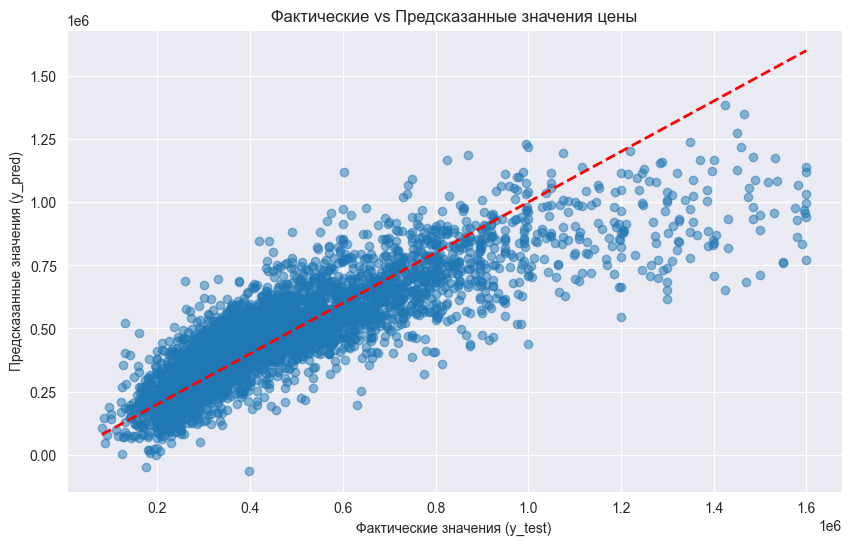

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Фактические vs Предсказанные значения цены')
plt.show()


Вывод по графику:
1. Точечное облако в целом следует диагонали - модель работает адекватно.
2. Больше разброс для дорогих домов (правая часть графика) - модель хуже предсказывает элитное жилье.
3. Виден систематический недоучет очень дорогих домов (точки ниже диагонали справа).
4. Для дешевых домов прогноз более точный (точки ближе к диагонали слева).

Общие рекомендации:
1. Попробовать логарифмировать целевую переменную (price) для работы с правосторонним распределением.
2. Исключить мультиколлинеарные признаки (например, оставить только sqft_living из группы площадей).
3. Попробовать добавить полиномиальные признаки для учета нелинейностей.

# Строим Ridge

In [50]:
ridge = Ridge(random_state=42)
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train_scaled, y_train)

,estimator,Ridge(random_state=42)
,param_grid,"{'alpha': [0.001, 0.01, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


In [51]:
ridge_best = grid_ridge.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_scaled)

In [52]:
print(f"\nНа тестовой выборке:")
print(f"R²: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")


На тестовой выборке:
R²: 0.7029
MAE: 100120.58
RMSE: 141266.52


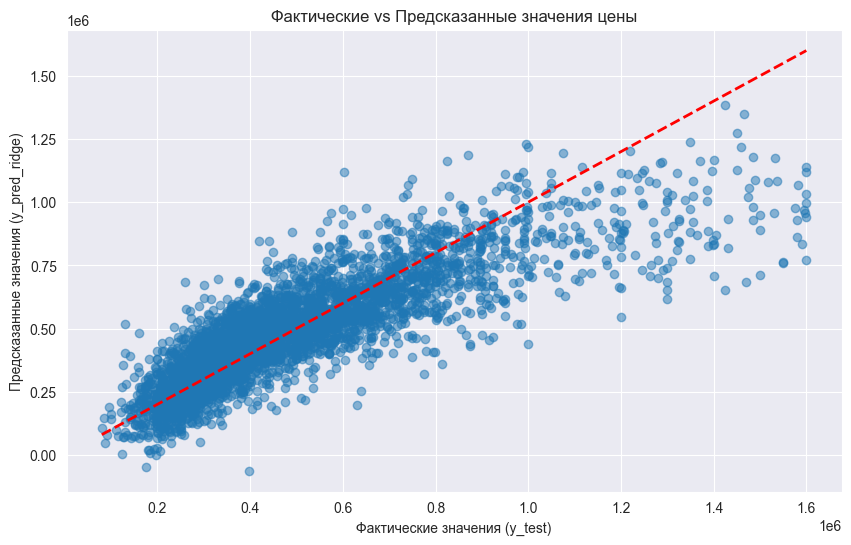

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred_ridge)')
plt.title('Фактические vs Предсказанные значения цены')
plt.show()

1. Основной паттерн сохранен: точки в целом следуют диагонали, модель работает адекватно
2. Сравнение с обычной линейной регрессией:
    - Разброс точек похож, но возможно немного меньше для среднего ценового диапазона
    - Ridge не показал значительного улучшения визуально
3. Проблемные зоны остались:
    - Для дорогих домов (правая часть) предсказания занижены
    - Для самых дешевых домов возможны переоценки
 4. Признаки регуляризации :
    - Если Ridge выбрал alpha > 0.01, модель упростилась для борьбы с переобучением
    - Это может помочь на новых данных, даже если на тесте разница не очевидна

# Выводы

Модель объясняет около 70% изменчивости цен на недвижимость в данных. Это указывает на умеренно хорошее качество модели.

В среднем, прогнозы модели отклоняются от реальных цен примерно на 100 тысяч денежных единиц, что связано с высокой вариативностью рынка. Удаление выбросов положительно повлияло на качество модели: MAE уменьшилась примерно с 127k до 100k, а RMSE снизилась с 212k до 141k. Это говорит о том, что аномально дорогие объекты мешали модели корректно обучаться и увеличивали ошибку предсказания.

Простая лин регресия показала себя так же, как и регрессии с регуляризаторами. Поэтому дело не в модели. Можно оставить лин регрессию, поскольку она самая быстрая и нужен более качественный анализ

Итог: Построенная линейная регрессия является работоспособной базовой моделью, выявляющей основные ценовые зависимости. Она пригодна для первоначальной оценки, но для точного прогнозирования требуется провести улучшенный EDA.


